In [ ]:
# Mounting the Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
#Importing the happiness_score_dataset.csv

hp=pd.read_csv('/content/drive/My Drive/DS Datasets/happiness_score_dataset.csv')

In [ ]:
hp.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [ ]:
hp.shape

(158, 12)

In [ ]:
hp.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

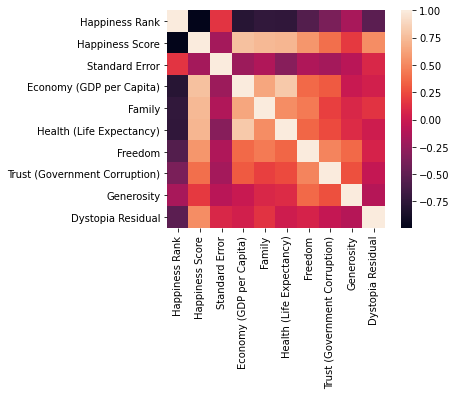

In [ ]:
#Checking the correlation between variables

cor = hp.corr()

#Plot using heat map
sns.heatmap(cor, square = True) 

In [ ]:
# Checking the missing values

hp.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [ ]:
#Converted into one hot encoding
hp1=pd.get_dummies(hp)
hp1.shape

(158, 178)

In [ ]:
#Scaling of data

ss = StandardScaler()
ss.fit_transform(hp1)

array([[-1.72099989,  1.93736005, -0.80592569, ..., -0.21530819,
        -0.58222251,  2.55417492],
       [-1.69907456,  1.91458063,  0.05588945, ..., -0.21530819,
        -0.58222251,  2.55417492],
       [-1.67714922,  1.88479215, -0.8544869 , ..., -0.21530819,
        -0.58222251,  2.55417492],
       ...,
       [ 1.67742676, -2.0761992 ,  0.13253425, ..., -0.21530819,
        -0.58222251, -0.39151586],
       [ 1.69935209, -2.1646885 ,  2.26396166, ..., -0.21530819,
         1.7175564 , -0.39151586],
       [ 1.72127743, -2.22251319,  1.13418227, ..., -0.21530819,
         1.7175564 , -0.39151586]])

In [ ]:
#Ploting the clusters using KMeans

def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(hp1, 2)
kmeans = pd.DataFrame(clust_labels)
hp1.insert((hp1.shape[1]),'kmeans',kmeans)

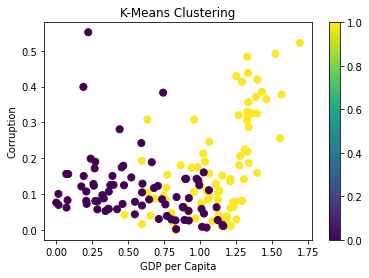

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(hp1['Economy (GDP per Capita)'],hp1['Trust (Government Corruption)'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)